In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
import math
#sns.set(font_scale=1.3)
N=42

datadir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_EnBarrier/Data/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteESCRT/Data_and_Figures/Fig_EnBarrier/Plots/'
loc2 = datadir
EntList = pandas.read_csv(datadir + "Entrop02.txt", header = None, sep=' ')#[0]
Entropy = EntList.values.reshape(N-1,N-1)

def ActualReactPath(P1, P2,q, Farr2):
    ReactPath2 = np.zeros((N-1,N-1))
    for i in range(q):
        Farr2[int(P1[i]),int(P2[i])] = None
        
    return Farr2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


5.025005660066008
-63.73333333336911


posx and posy should be finite values


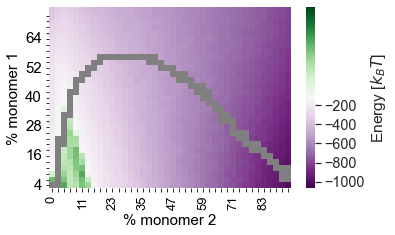

In [3]:
#EList = pandas.read_csv(loc2 + "TEST03subs_50_150.txt", sep=' ', header = None, skiprows = 1)#[0]
namedat1 = 'bigspaceTest1_'
namedat = 'smolspaceTest1_'
EList = pandas.read_csv(loc2 + namedat1 +"103subs_100_300.txt", sep=' ', header = None, skiprows = 1)#[0]
P0= pandas.read_csv(loc2 + namedat1 +"Prob0.txt", header = None, sep=' ')[0]
P1= pandas.read_csv(loc2 + namedat1 +"Prob1.txt", header = None, sep=' ')[0]
P2 = pandas.read_csv(loc2 + namedat1 +"Prob2.txt", header = None, sep=' ')[0]
q = len(P0)
print(np.average(P0[0:int(q)]))
P1round = np.round(P1,0)
P2round = np.round(P2,0)
N=42

Earr_ = EList.values.reshape(N,N)
Earr = (Earr_.T)*(20/2.5)
print(Earr[0,0])
#Farr = np.add(Earr*10,Entropy)
x1 = np.arange(0,N-2,1)*(100/N)
y1 = np.arange(1,N-10,1)*(100/N)
X = [math.trunc(i) for i in x1]
Y = [math.trunc(i) for i in y1]

#fig, ax = plt.subplots()
cmaps = ["PRGn", "viridis", "magma"]
#plt.gcf().subplots_adjust(left=0.2)
#plt.gcf().subplots_adjust(bottom=0.25)
fig2, ax2  = plt.subplots()
plt.gcf().subplots_adjust(left=0.2)
plt.gcf().subplots_adjust(bottom=0.25)
sns.set(font_scale=1.3)

#divnorm2 = TwoSlopeNorm(vmin=(Earr[:N-10,:N-2]).min(), vcenter=0,vmax=(Earr[:N-10,:N-12]).max())
divnorm2 = TwoSlopeNorm(vmin=(Earr[:N-10,:N-2]).min(), vcenter=-120,vmax=-75) #vcenter=-120
#divnorm2 = TwoSlopeNorm(vmin=-1000, vcenter=-120,vmax=-75)
#divnorm2 = TwoSlopeNorm(vmin=-1000,vcenter = -120)

g=sns.heatmap(ActualReactPath(P1,P2,q, Earr)[1:N-10,:N-2],ax = ax2,xticklabels=X, yticklabels=Y[1:], cmap=cmaps[0], norm=divnorm2, cbar=True, cbar_kws={'label': 'Energy [$k_{B}T$]'})
#g=sns.heatmap(ActualReactPath(P1,P2,q, Earr)[1:N-10,:N-2],ax = ax2,xticklabels=X, yticklabels=Y, cmap="PRGn", norm=divnorm2, cbar=True, cbar_kws={'label': 'Energy [$k_{B}T$]'})
g.set_facecolor('grey')
ax2.invert_yaxis()
#ax.set_xlabel("% occupation of 2s", fontsize = 15) 
#ax.set_ylabel("% occupation of 1s", fontsize = 15) 
ax2.set_xlabel("% monomer 2", fontsize = 15) 
ax2.set_ylabel("% monomer 1", fontsize = 15) 
#ax.set_title("$<E>$")
n = 5  # Keeps every nth label
[l.set_visible(False) for (i,l) in enumerate(ax2.yaxis.get_ticklabels()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0]
#ax2.legend()
plt.xticks(size = 13)
plt.yticks(size = 15)
#print(np.shape(X),np.shape(Y), np.shape(ActualReactPath(P1,P2,q, Earr)[1:N-10,:N-2]))
plt.show()
fname2  = 'BarrierHeat_cor_10_0s_badcbar.pdf'
fig2.savefig(plotsdir+fname2)